In [5]:

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d lavaman151/plantifydr-dataset


Dataset URL: https://www.kaggle.com/datasets/lavaman151/plantifydr-dataset
License(s): copyright-authors
... resuming from 951058432 bytes (1817094495 bytes left) ...
100% 2.58G/2.58G [01:34<00:00, 23.8MB/s]
100% 2.58G/2.58G [01:34<00:00, 19.2MB/s]


In [6]:

!unzip plantifydr-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: PlantDiseasesDataset/Tomato/train/Tomato Yellow Leaf Curl Virus/TomatoYellowCurlVirus(3679).JPG  
  inflating: PlantDiseasesDataset/Tomato/train/Tomato Yellow Leaf Curl Virus/TomatoYellowCurlVirus(368).JPG  
  inflating: PlantDiseasesDataset/Tomato/train/Tomato Yellow Leaf Curl Virus/TomatoYellowCurlVirus(3680).JPG  
  inflating: PlantDiseasesDataset/Tomato/train/Tomato Yellow Leaf Curl Virus/TomatoYellowCurlVirus(3681).JPG  
  inflating: PlantDiseasesDataset/Tomato/train/Tomato Yellow Leaf Curl Virus/TomatoYellowCurlVirus(3682).JPG  
  inflating: PlantDiseasesDataset/Tomato/train/Tomato Yellow Leaf Curl Virus/TomatoYellowCurlVirus(3683).JPG  
  inflating: PlantDiseasesDataset/Tomato/train/Tomato Yellow Leaf Curl Virus/TomatoYellowCurlVirus(3684).JPG  
  inflating: PlantDiseasesDataset/Tomato/train/Tomato Yellow Leaf Curl Virus/TomatoYellowCurlVirus(3685).JPG  
  inflating: PlantDiseasesDataset/Tomato/train/Tomato Yellow L

In [7]:
from pathlib import Path
path = Path('/content/PlantDiseasesDataset')


In [8]:

[x for x in path.iterdir() if x.is_dir()]


[PosixPath('/content/PlantDiseasesDataset/Peach'),
 PosixPath('/content/PlantDiseasesDataset/Citrus'),
 PosixPath('/content/PlantDiseasesDataset/Strawberry'),
 PosixPath('/content/PlantDiseasesDataset/Grape'),
 PosixPath('/content/PlantDiseasesDataset/Bell pepper'),
 PosixPath('/content/PlantDiseasesDataset/Tomato'),
 PosixPath('/content/PlantDiseasesDataset/Corn'),
 PosixPath('/content/PlantDiseasesDataset/Potato'),
 PosixPath('/content/PlantDiseasesDataset/Cherry'),
 PosixPath('/content/PlantDiseasesDataset/Apple')]

In [9]:
from fastai.vision.all import *

In [10]:
plant_list = ['Apple','Bell pepper','Cherry','Citrus','Corn','Grape','Peach','Potato','Strawberry','Tomato']
plant = 'Apple'

In [11]:
model_path = Path(path/plant)
batch_tfms=[Normalize.from_stats(*imagenet_stats)]

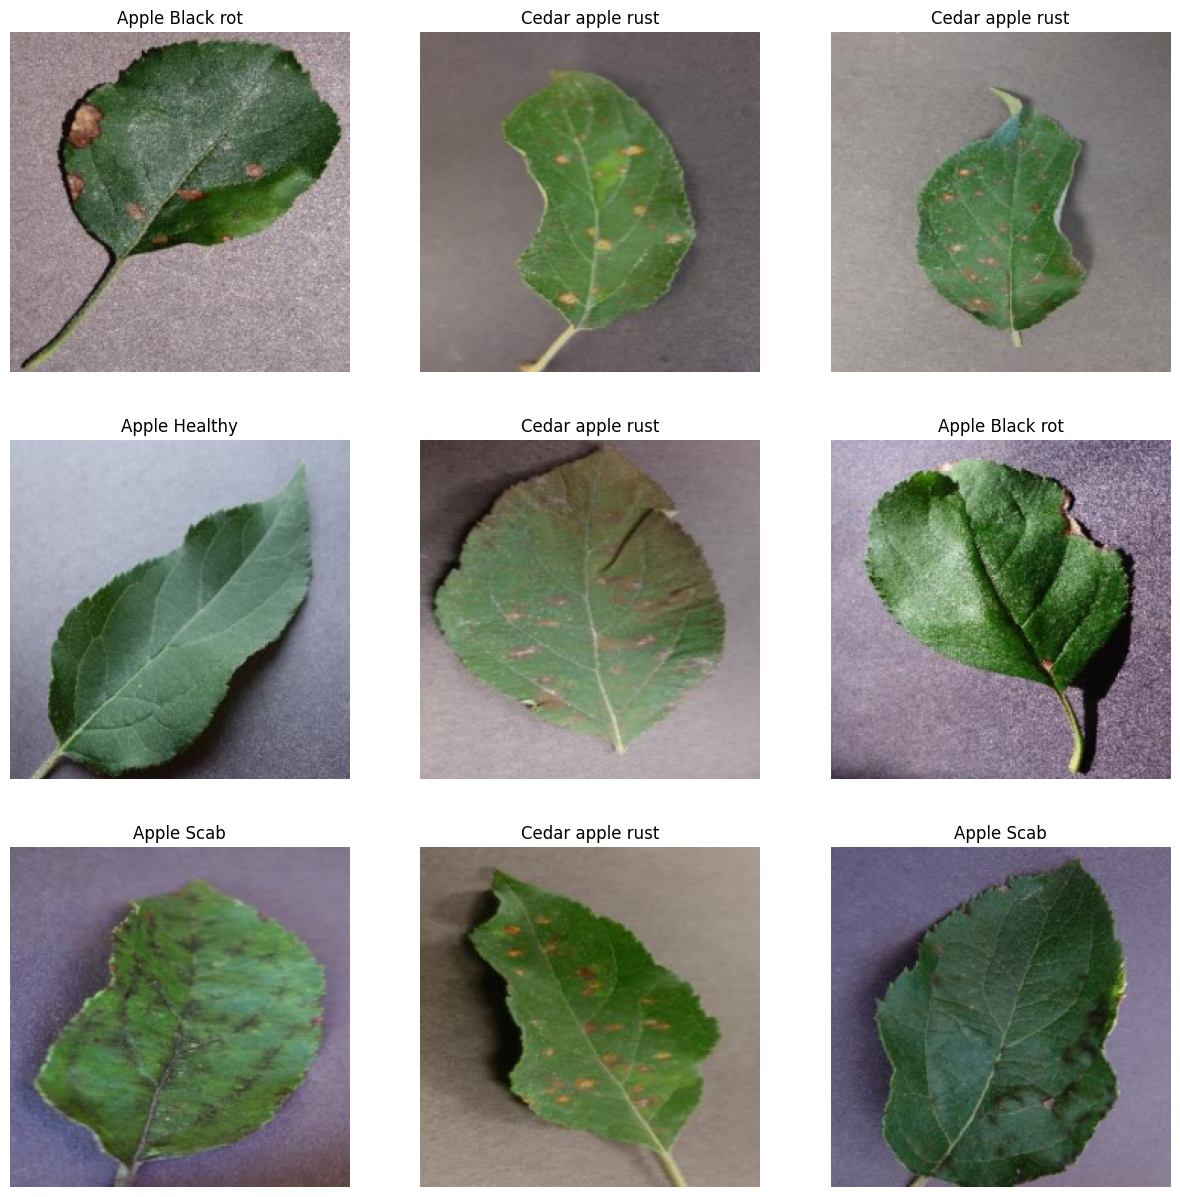

In [12]:
dls = ImageDataLoaders.from_folder(path/plant,train='train',valid_pct=0.2,seed=1000,item_tfms=Resize(224),
                                   batch_tfms=batch_tfms,bs=128)
dls.show_batch(figsize=(15,15))

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 143MB/s]
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler

Better model found at epoch 0 with accuracy value: 0.9521276354789734.


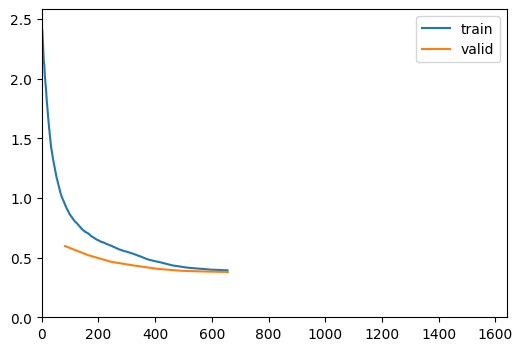

Better model found at epoch 1 with accuracy value: 0.9772036671638489.
Better model found at epoch 2 with accuracy value: 0.9889817833900452.
Better model found at epoch 3 with accuracy value: 0.9905015230178833.
Better model found at epoch 4 with accuracy value: 0.9912614226341248.
Better model found at epoch 5 with accuracy value: 0.9946808218955994.
Better model found at epoch 6 with accuracy value: 0.9958206415176392.
No improvement since epoch 6: early stopping


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

In [13]:
f1 = F1Score(average='weighted')
mcc = MatthewsCorrCoef()
learn = cnn_learner(dls, models.resnet50,loss_func=LabelSmoothingCrossEntropy(),metrics=[accuracy,f1,mcc],
                    cbs=[SaveModelCallback(monitor='accuracy'),EarlyStoppingCallback(monitor='accuracy',patience=2)
                         ,ShowGraphCallback()],model_dir=model_path/'models').to_fp16()
learn.fit_one_cycle(20)

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


Better model found at epoch 0 with accuracy value: 0.9924012422561646.


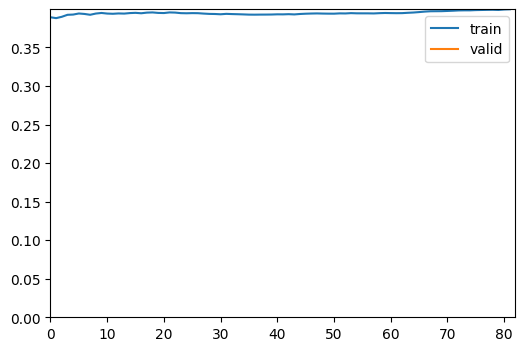

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

Better model found at epoch 0 with accuracy value: 0.9935410618782043.


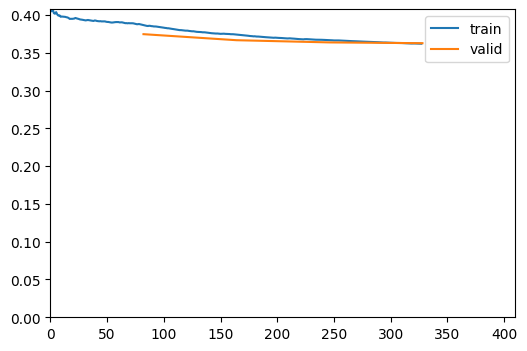

Better model found at epoch 1 with accuracy value: 0.9950608015060425.
Better model found at epoch 2 with accuracy value: 0.9962006211280823.
No improvement since epoch 2: early stopping


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

In [14]:
learn.fine_tune(5)

In [14]:
learn = learn.to_fp32()
learn.save(model_path/f'models/{plant}')

In [23]:
model_path

Path('/content/PlantDiseasesDataset/Apple')

In [25]:
learn = cnn_learner(dls, models.resnet50).load(model_path/f'models/model')
learn.summary()

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:61: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


Sequential (Input shape: 128 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 64 x 112 x 11 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     128 x 64 x 56 x 56  
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     128 x 256 x 56 x 56 
Conv2d                                    16384      False     
BatchNorm2d                       

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


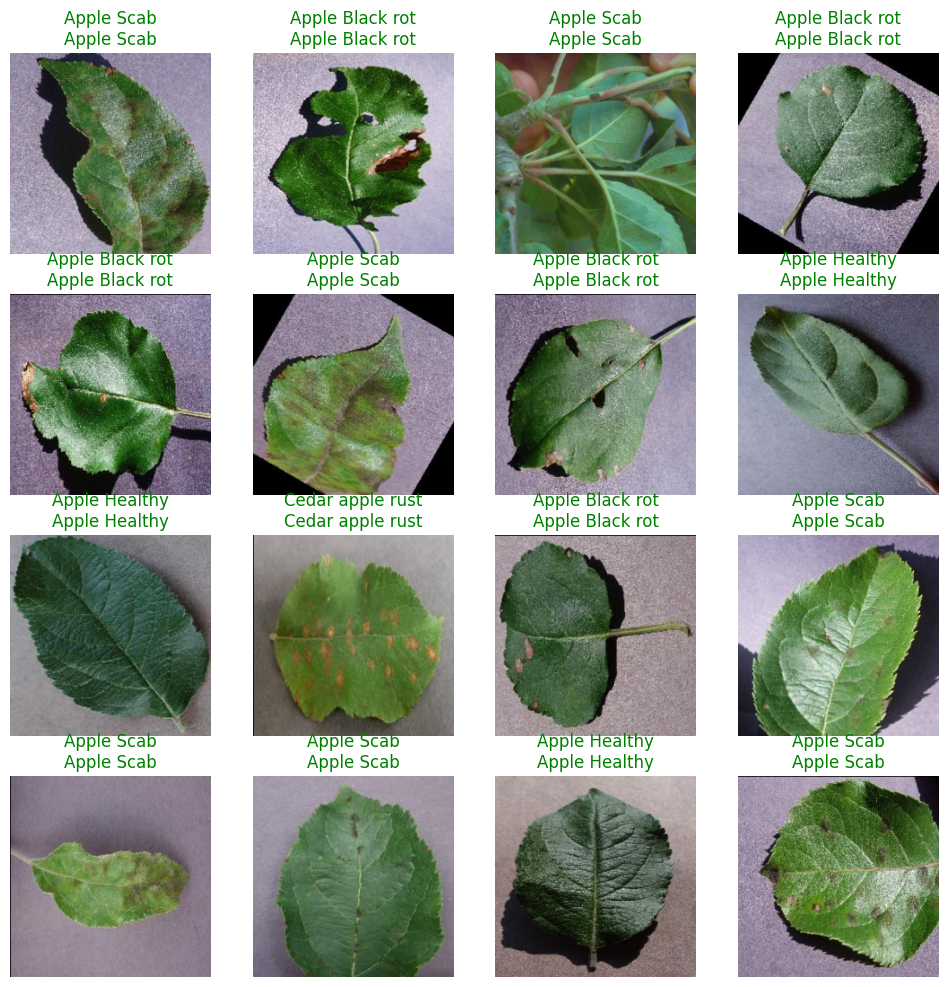

In [16]:
learn.show_results(max_n=16)

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


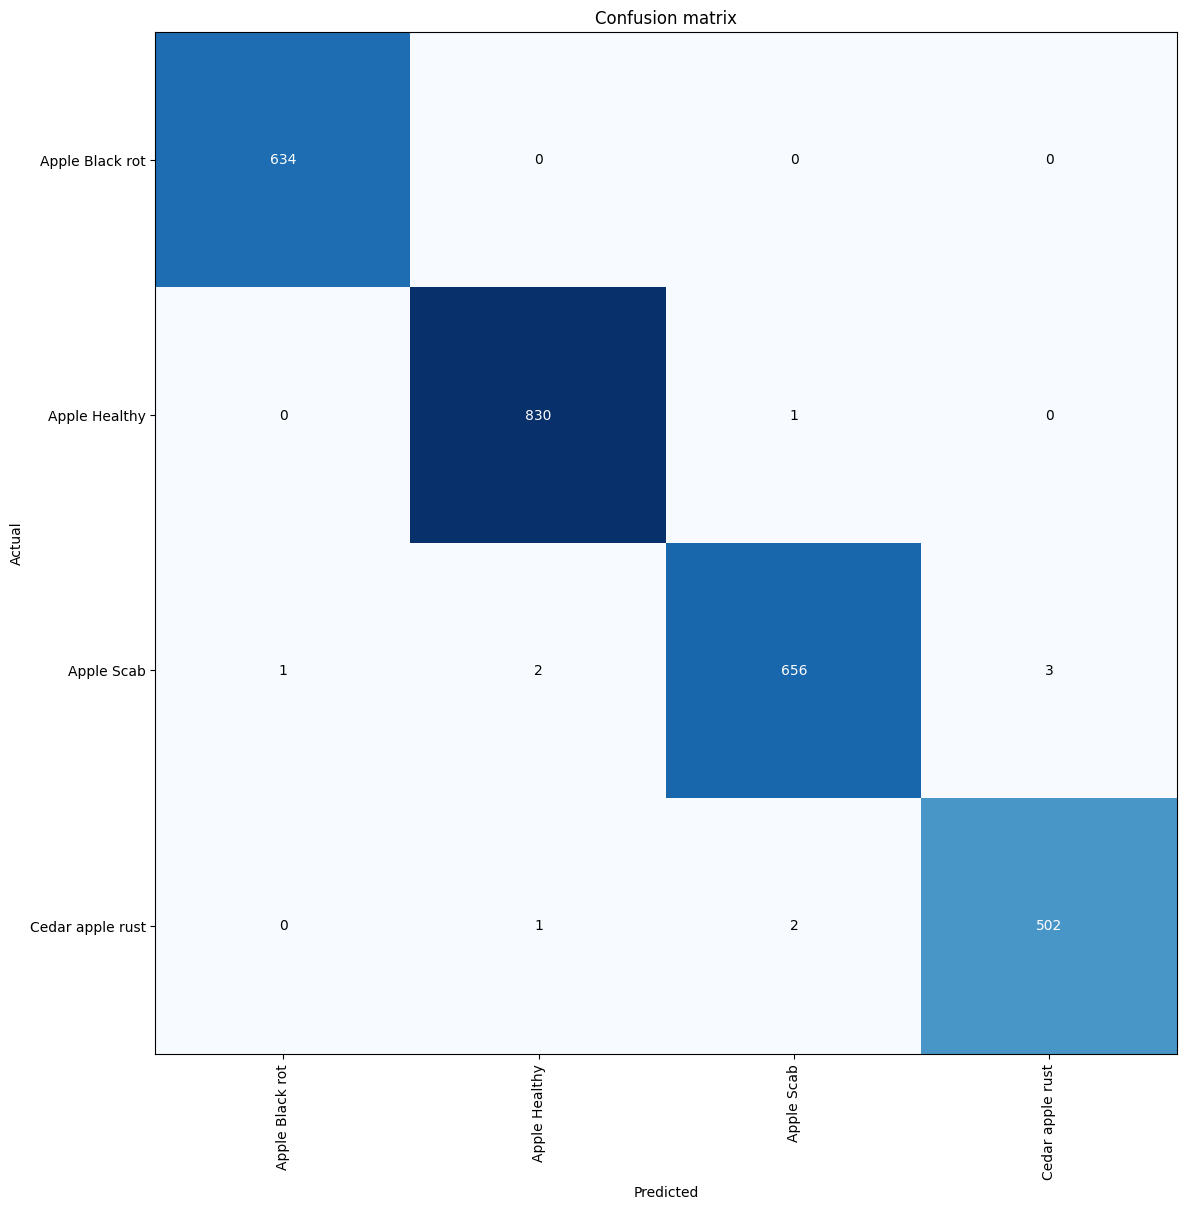

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix(figsize=(12,12))

In [18]:
learn.export(f'{plant}.pkl')